In [2]:
from IPython.display import display, Markdown
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

## Import Data



In [14]:
dic_country = \
{'AUS': 'Australia',
 'BRA': 'Brazil',
 'CAN': 'India',
 'CHN': 'China',
 'GBR': 'United Kingdom',
 'IND': 'India',
 'JPN': 'Japan',
 'SGP': 'Singapore',
 'USA': 'United States'}
country = list(dic_country.keys())
manufacture = {}
service = {}
for con in country:
  manufacture[con] = pd.read_excel('../../Data/cleaned/Manufacturing.xlsx',sheet_name = con)
  manufacture[con] = manufacture[con].replace('..',np.nan)
  service[con] = pd.read_excel('../../Data/cleaned/Service.xlsx',sheet_name = con)
  service[con] = service[con].replace('..',np.nan)

## Univariate Time Series Analysis

In [15]:
service['USA']

,Year,Employment_in_services_male,Urban_population_growth,Net_trade_in_goods_services,Foreign_direct_investment,Mobile_cellular_subscriptions,Secure_Internet_servers,School_enrollment_tertiary,Population_labor_rate,Population_density,...,Employment_in_industry_%_of_total_employment,GDP_per_capita_current_USD,Final_consumption,Primary_completion_rate,Educational_attainment,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Access_finance,"New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]",Services_value_added_%_of_GDP
0,1960,NaN,NaN,NaN,NaN,0.0,NaN,NaN,60.193195,NaN,...,NaN,3007.123445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,NaN,2.200571,NaN,NaN,NaN,NaN,NaN,60.006709,20.055880,...,NaN,3066.562869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,NaN,2.076494,NaN,NaN,NaN,NaN,NaN,59.990825,20.366723,...,NaN,3243.843078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,NaN,1.970559,NaN,NaN,NaN,NaN,NaN,60.098707,20.661953,...,NaN,3374.515171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,NaN,1.913437,NaN,NaN,NaN,NaN,NaN,60.268451,20.950959,...,NaN,3573.941185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,68.870003,0.871785,-5.127350e+11,1.954982,400000000.0,30338.033467,88.167389,65.722106,35.542495,...,19.730000,59914.777797,1.596980e+13,98.832199,NaN,87.274889,1.2,NaN,NaN,77.031393
58,2018,68.750000,0.767437,-5.809560e+11,1.046005,348242000.0,65833.810325,88.299179,65.483306,35.730096,...,19.870001,62805.253758,1.678295e+13,100.092697,96.029373,88.498903,1.0,NaN,NaN,76.739738
59,2019,68.809998,0.701868,-5.763380e+11,1.472654,355695000.0,123980.019575,87.888710,65.241077,35.893176,...,19.910000,65094.799429,1.740259e+13,100.489052,NaN,89.430285,1.0,NaN,NaN,77.199503
60,2020,NaN,1.209501,-6.766790e+11,0.712711,351477000.0,140808.319539,NaN,64.997327,36.239845,...,NaN,63027.679527,1.712556e+13,NaN,96.460770,90.900000,NaN,NaN,NaN,80.136410


In [16]:
# get target value
manufacture_y = {}
service_y = {}
def get_target_val(country, is_service):
  if not is_service:
    target = manufacture[country][['Manufacturing_value added_%_of_GDP','Year']]
    target.index = target['Year']
    del target['Year']
    target_trim = target[~target['Manufacturing_value added_%_of_GDP'].isna()]
    return target_trim
  else:
    target = service[country][['Services_value_added_%_of_GDP','Year']]
    target.index = target['Year']
    del target['Year']
    target_trim = target[~target['Services_value_added_%_of_GDP'].isna()]
    return target_trim
for con in country:
    manufacture_y[con] = get_target_val(con, False)
    service_y[con] = get_target_val(con, True)

### Target Value Visualization

#### Manufacture

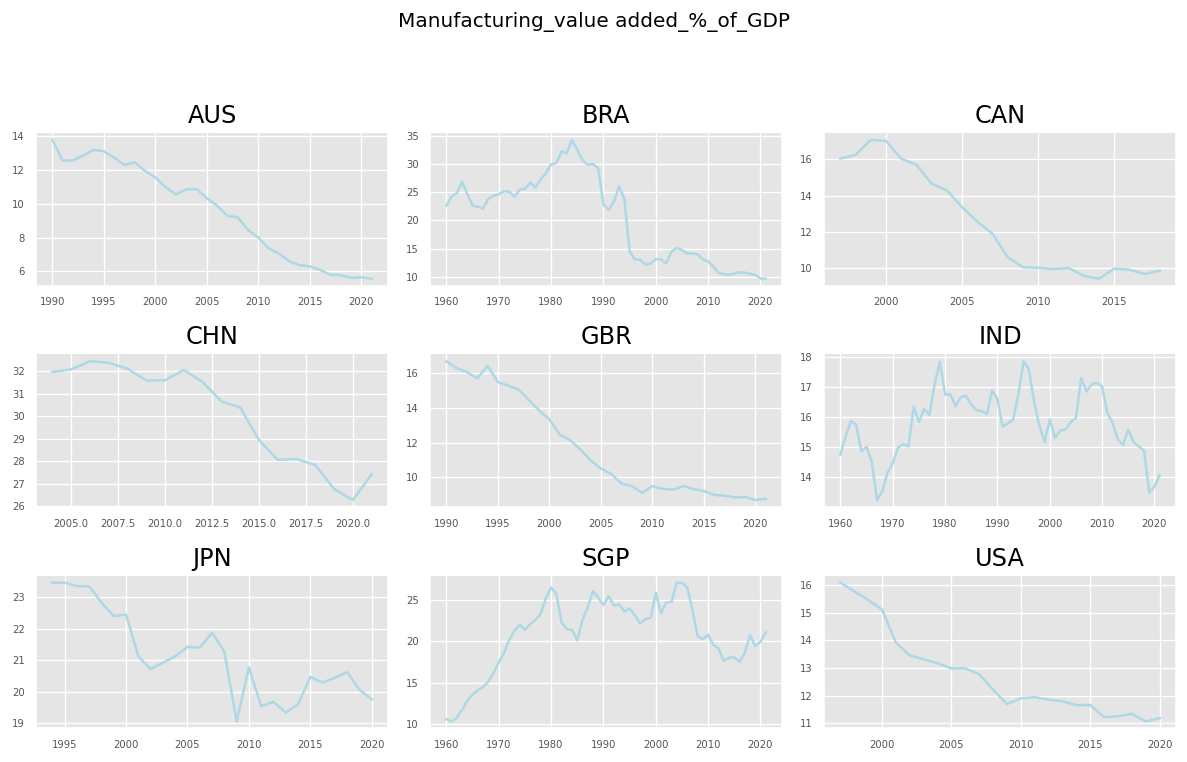

In [17]:
# for manufaturing
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot('Manufacturing_value added_%_of_GDP', data=manufacture_y[country[i]], color="lightblue")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.suptitle("Manufacturing_value added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

#### Service

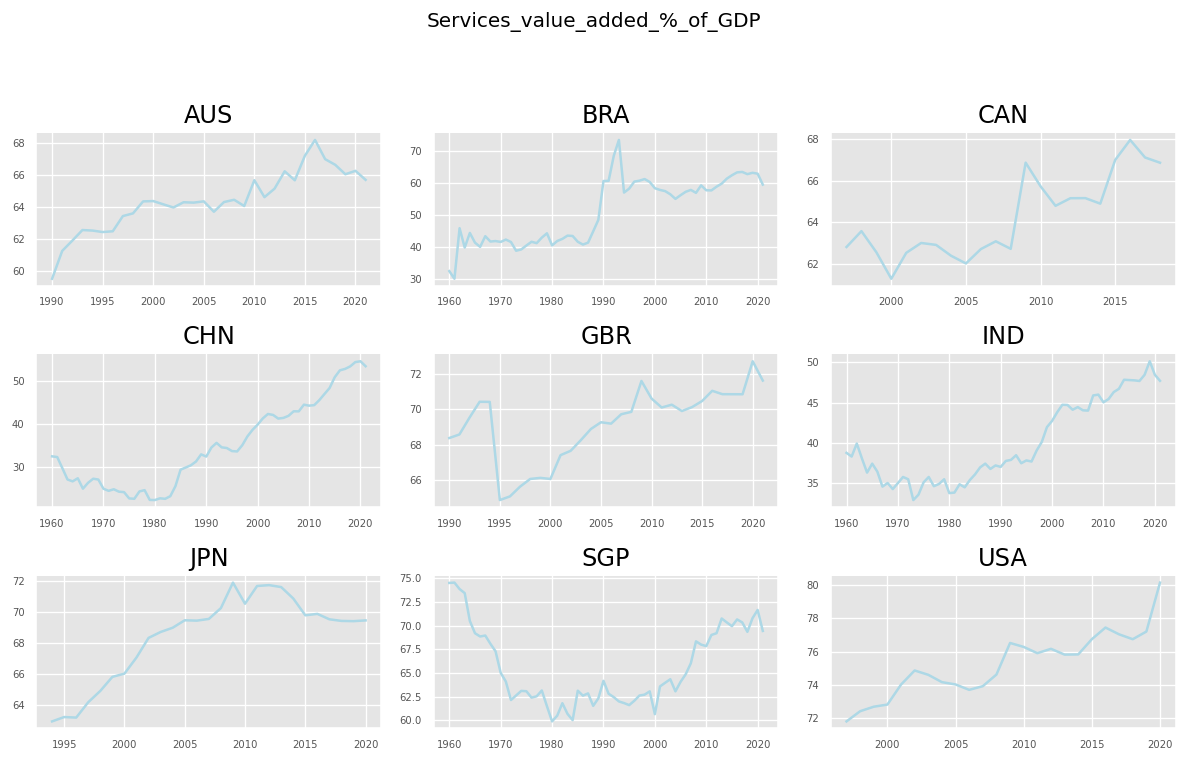

In [18]:
# for service
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot('Services_value_added_%_of_GDP',data= service_y[country[i]],color = "lightblue")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.suptitle("Services_value_added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

### Stationarity

#### Visualization Inspection

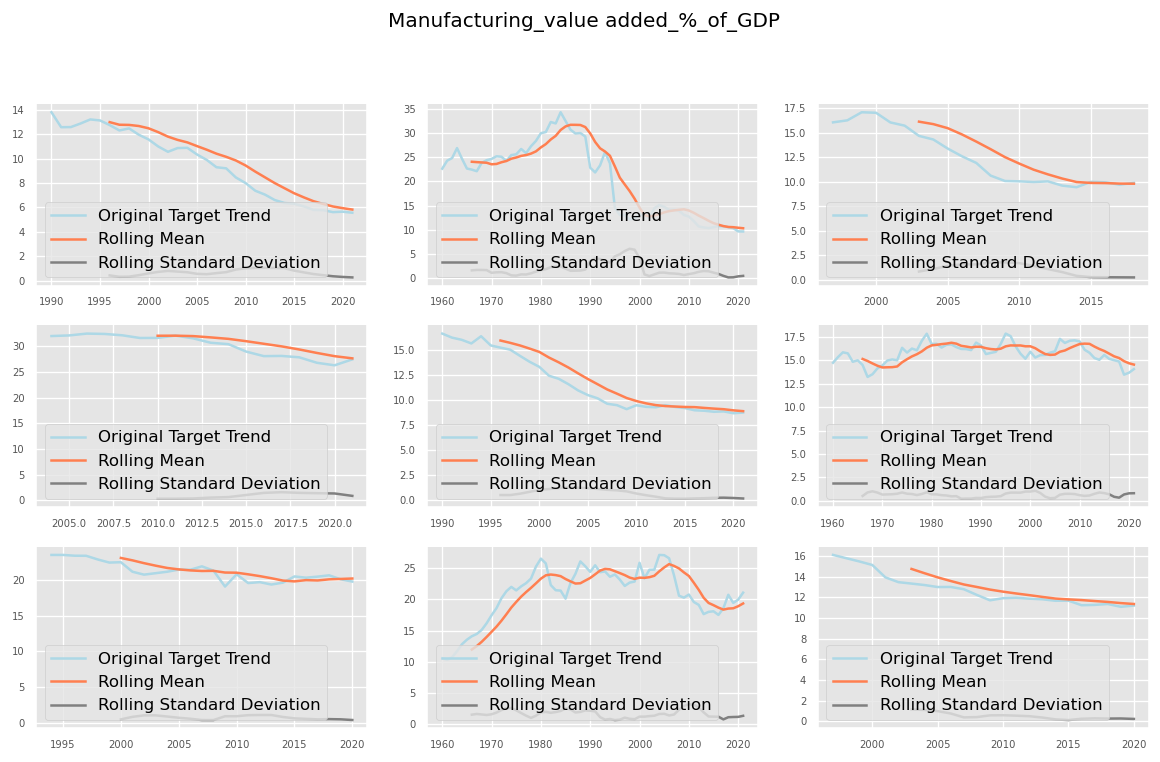

In [19]:
def vis_stationary(df,title,rolling_num = 7):
  fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
  for i, ax in enumerate(axes.flatten()):
      rolling_mean = df[country[i]].rolling(rolling_num).mean()
      rolling_std = df[country[i]].rolling(rolling_num).std()
      ax.plot(df[country[i]], color="lightblue",label="Original Target Trend")
      ax.plot(rolling_mean, color="coral", label="Rolling Mean")
      ax.plot(rolling_std, color="grey", label = "Rolling Standard Deviation")
      # Decorations
      #ax.seasonal_decompose(df[country],model='additive', period=7)
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=6)
      ax.legend(loc="lower left")

  plt.suptitle(title,y=1.05)
  plt.tight_layout()

  plt.show()


vis_stationary(manufacture_y, "Manufacturing_value added_%_of_GDP")


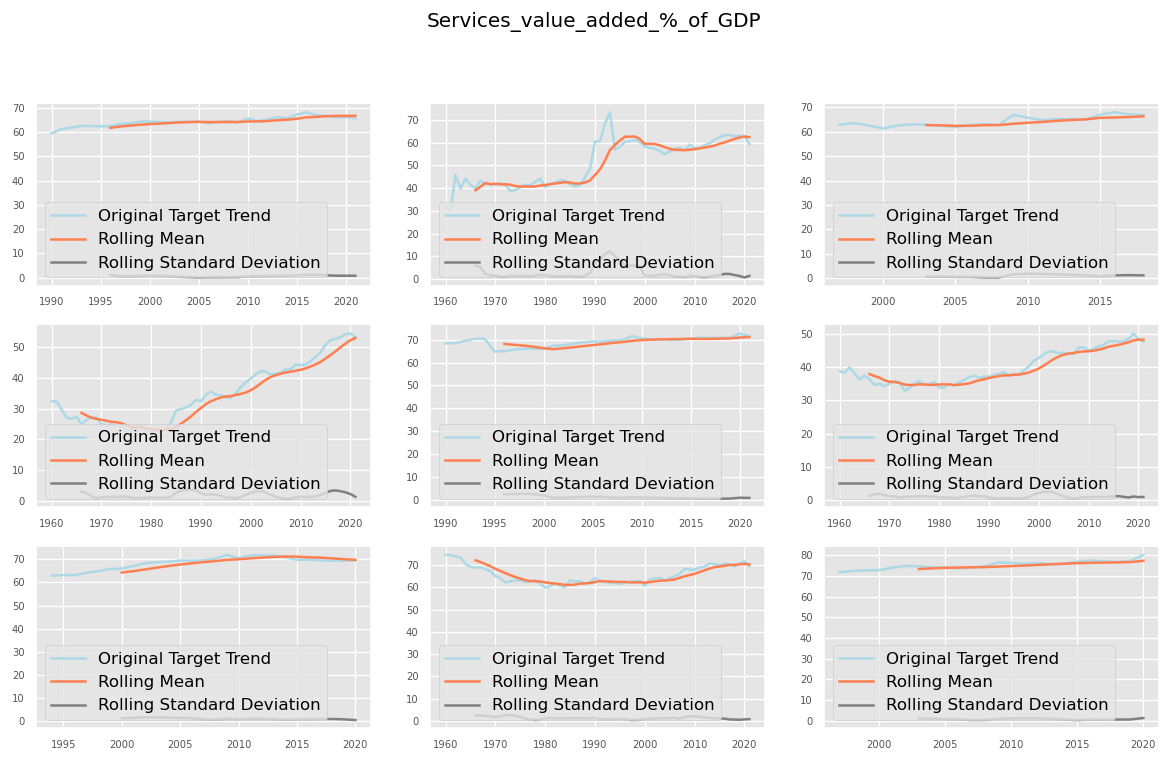

In [20]:
vis_stationary(service_y, "Services_value_added_%_of_GDP")

### ADF test

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Cannot reject Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   
    print("\n")

In [23]:
for con in country:
  adfuller_test(manufacture_y[con],0.05, con)

    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5292
 No. Lags Chosen       = 0
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.8862. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5019
 No. Lags Chosen       = 2
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.8916. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

In [24]:
for con in country:
  adfuller_test(service_y[con],0.05, con)

    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8928
 No. Lags Chosen       = 0
 Critical value 1%     = -3.661
 Critical value 5%     = -2.961
 Critical value 10%    = -2.619
 => P-Value = 0.0462. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0224
 No. Lags Chosen       = 0
 Critical value 1%     = -3.542
 Critical value 5%     = -2.91
 Critical value 10%    = -2.593
 => P-Value = 0.2768. Cannot reject Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

#### First Order Difference

In [25]:
diff_manu = {}
diff_ser = {}
for con in country:
  diff_manu[con] = manufacture_y[con].diff().dropna()
  diff_ser[con] = service_y[con].diff().dropna()

for con in country:
  adfuller_test(diff_manu[con],0.05, con)

    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3161
 No. Lags Chosen       = 0
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.8523
 No. Lags Chosen       = 1
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

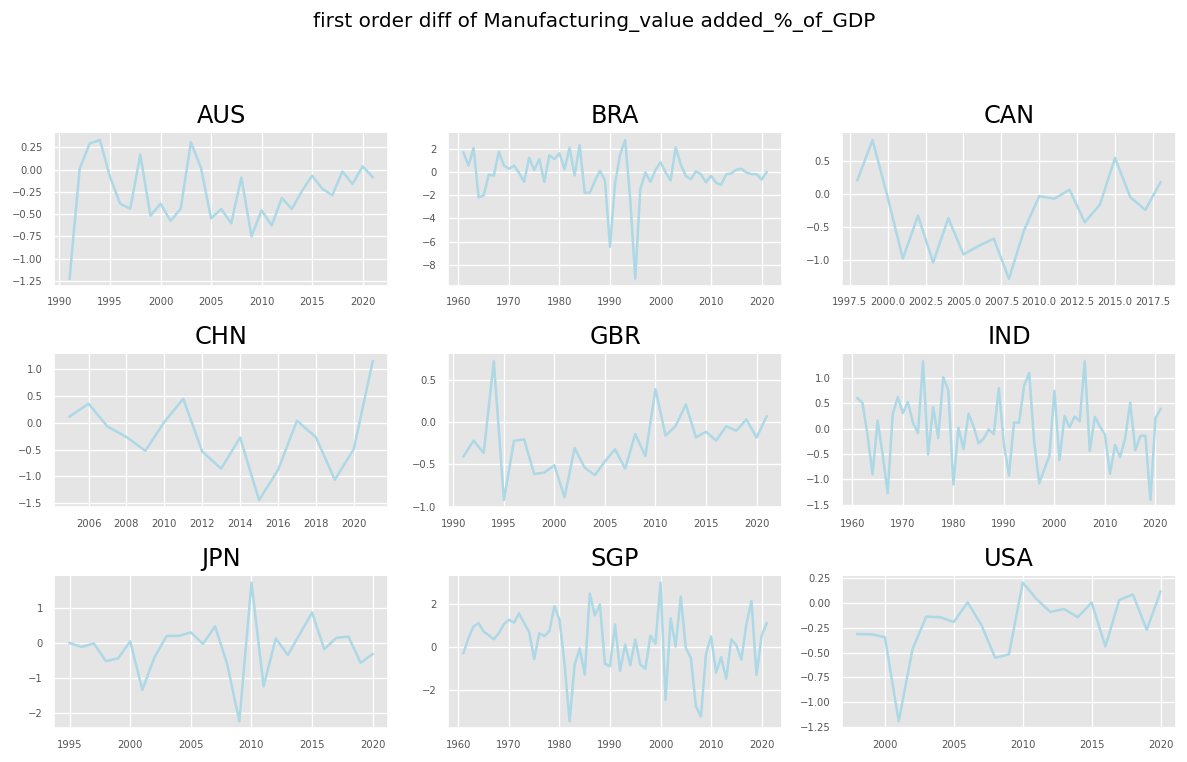

In [26]:
# for manufacture
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot("Manufacturing_value added_%_of_GDP",data= diff_manu[country[i]],color = "lightblue")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.suptitle("first order diff of Manufacturing_value added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
for con in country:
  adfuller_test(diff_ser[con],0.05, con)

    Augmented Dickey-Fuller Test on "AUS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.687
 No. Lags Chosen       = 0
 Critical value 1%     = -3.67
 Critical value 5%     = -2.964
 Critical value 10%    = -2.621
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BRA" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.6695
 No. Lags Chosen       = 3
 Critical value 1%     = -3.551
 Critical value 5%     = -2.914
 Critical value 10%    = -2.595
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 T

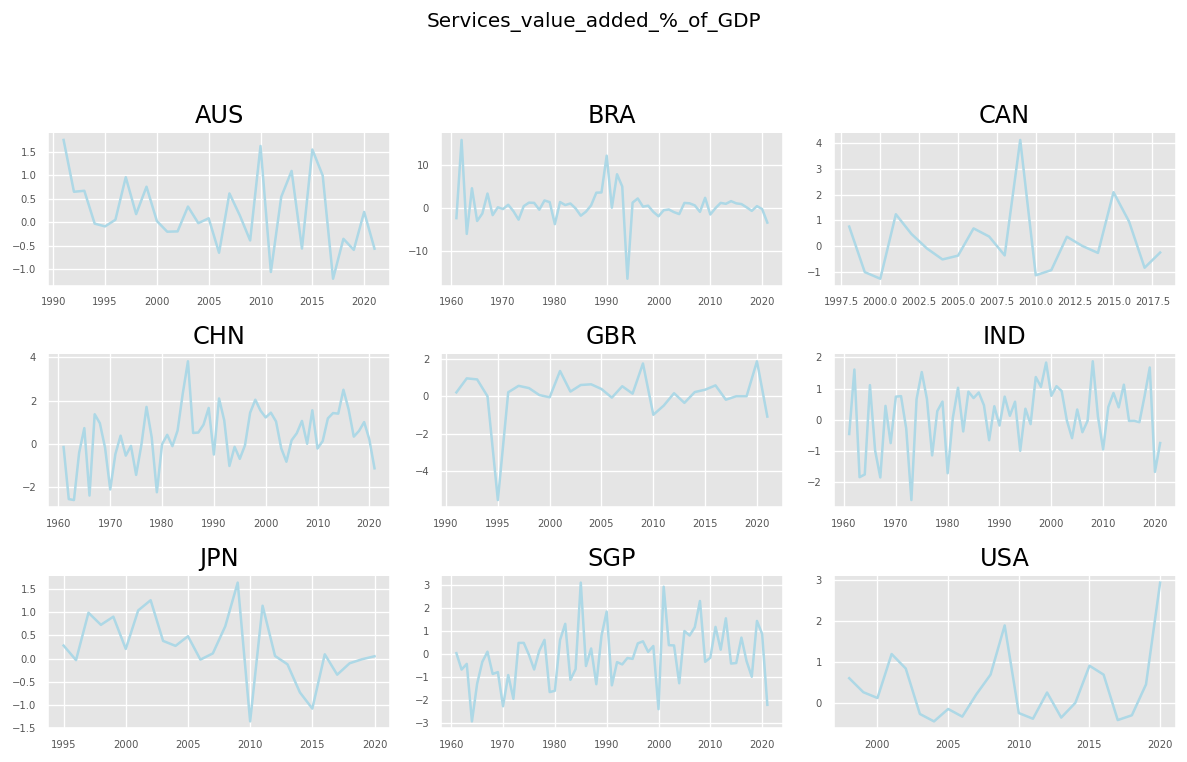

In [27]:
# for service
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot('Services_value_added_%_of_GDP',data= diff_ser[country[i]],color = "lightblue")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.suptitle("Services_value_added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

#### Second order difference 

In [28]:
adfuller_test(diff_manu['CAN'].diff().dropna(),0.05, "CAN")
# second-diff of Canada manufature is stationary

adfuller_test(diff_manu['GBR'].diff().dropna(),0.05, "GBR")
# second-diff of Germany manufature is stationary

adfuller_test(diff_ser['CAN'].diff().dropna(),0.05, "CAN")
# second-diff of Canada service still non-stationary, therefore disgard analysis of Canada in service part

    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.3357
 No. Lags Chosen       = 8
 Critical value 1%     = -4.223
 Critical value 5%     = -3.189
 Critical value 10%    = -2.73
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GBR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.6285
 No. Lags Chosen       = 1
 Critical value 1%     = -3.689
 Critical value 5%     = -2.972
 Critical value 10%    = -2.625
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAN" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

### Autocorrelation

In [30]:
print("=======Manufaturing Autocorrelation=======")
for con in country:
    autocorrelation_lag1 =  manufacture[con]["Manufacturing_value added_%_of_GDP"].autocorr(lag=1)
print(f"One Year Lag of {con}: ", autocorrelation_lag1)
print("\n")
print("=======Service Autocorrelation=======")
for con in country:
    autocorrelation_lag1 =  service[con]["Services_value_added_%_of_GDP"].autocorr(lag=1)
    print(f"One Year Lag of {con}: ", autocorrelation_lag1)

=======Manufaturing Autocorrelation=======
One Year Lag of USA:  0.983625139802899


=======Service Autocorrelation=======
One Year Lag of AUS:  0.9184916714686304
One Year Lag of BRA:  0.9220446439165608
One Year Lag of CAN:  0.8013451362151703
One Year Lag of CHN:  0.9919853158856025
One Year Lag of GBR:  0.8225060920740754
One Year Lag of IND:  0.9803764202326624
One Year Lag of JPN:  0.969898405687662
One Year Lag of SGP:  0.9539463218877783
One Year Lag of USA:  0.8938524099568661


### Model Fitting

#### Train-test split

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

In [32]:
def split_train_test(df, percentage = 0.8):
    train = df[:int(percentage*(len(df)))]
    valid = df[int(percentage*(len(df))):]
    return train, valid

train_manu = {}
valid_manu = {}
train_ser = {}
valid_ser = {}
for con in country:
    train_manu[con], valid_manu[con]= split_train_test(manufacture_y[con])
    train_ser[con], valid_ser[con]= split_train_test(service_y[con])

In [33]:
valid_manu['AUS']

,Manufacturing_value added_%_of_GDP
Year,
2015,6.299997
2016,6.085499
2017,5.798737
2018,5.777272
2019,5.615118
2020,5.651114
2021,5.565624


#### ACF and PACF plot

In [34]:
train_manu["CHN"]["Manufacturing_value added_%_of_GDP"].shape[0]//2-1

6

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Use

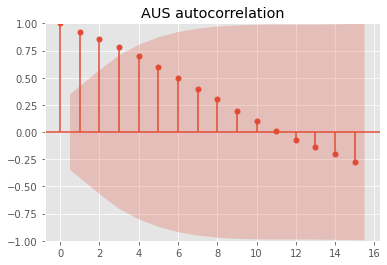

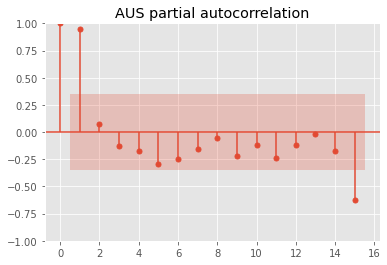

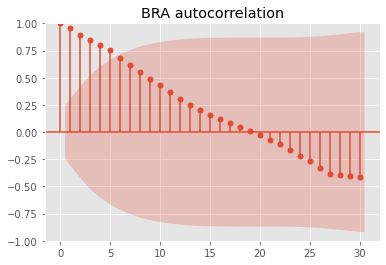

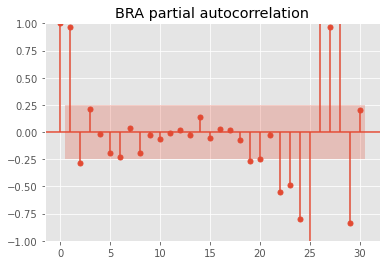

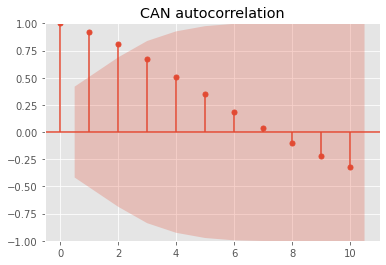

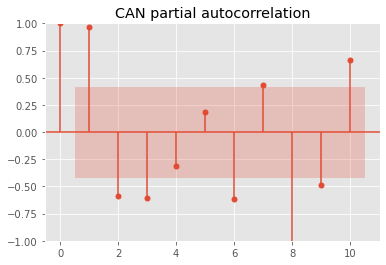

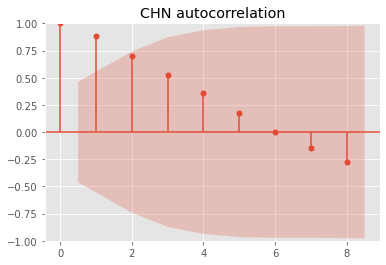

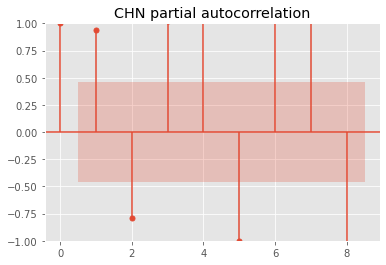

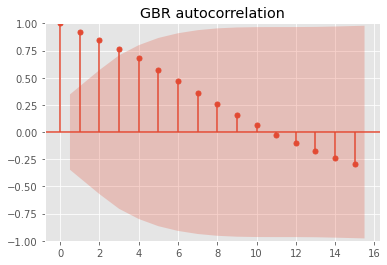

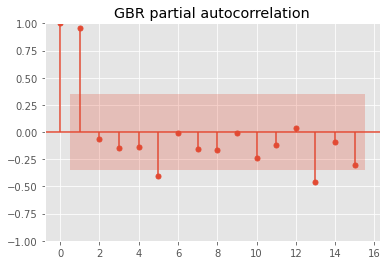

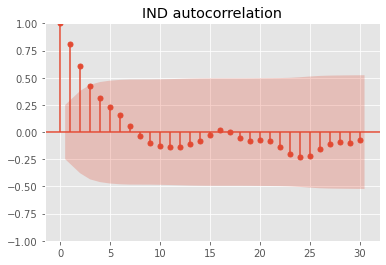

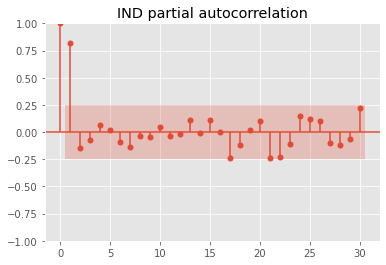

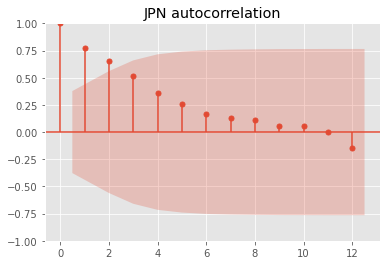

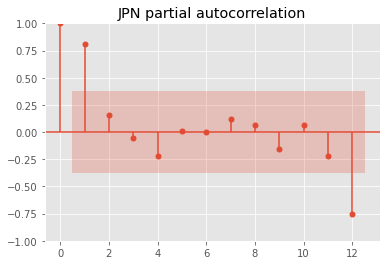

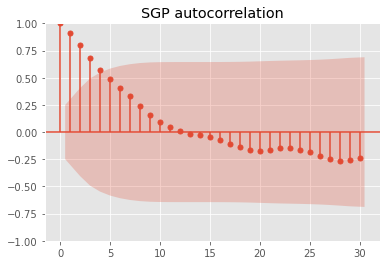

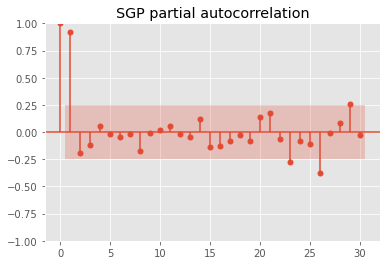

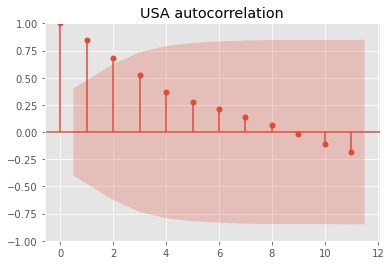

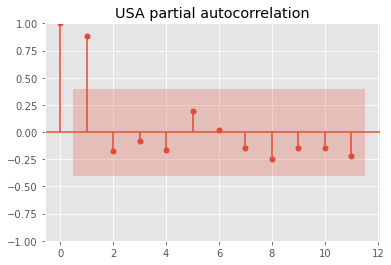

In [35]:
def show_acf_pacf(df, con, val):
    lag = df[con][val].shape[0]//2 - 1
    plot_acf(df[con][val],lags = lag,title = con + " autocorrelation")
    plot_pacf(df[con][val],lags = lag,title = con + " partial autocorrelation")

for con in country:
    show_acf_pacf(manufacture_y, con, "Manufacturing_value added_%_of_GDP")

#### ARIMA

In [37]:
# !pip install pmdarima
from pmdarima.arima import auto_arima
manu_model = {}
ser_model = {}
def set_auto_arima(train, con, manu, dic):
  model = auto_arima(train[con][manu],trace=True, error_action='ignore', suppress_warnings=True)
  model.fit(train[con][manu])
  dic[con] = model

  # forecast = model.predict(n_periods=len(test))
  # forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction']) 
print("======= Auto ARIMA for manufacture=======")
for con in country:
  print(f"======={con}=======")
  set_auto_arima(train_manu,con, "Manufacturing_value added_%_of_GDP",manu_model)
  print("\n")

print("======= Auto ARIMA for service=======")
for con in country:
  print(f"======={con}=======")
  set_auto_arima(train_ser,con, "Services_value_added_%_of_GDP",ser_model)
  print("\n")

======= Auto ARIMA for manufacture=======
=======AUS=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23.644, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25.159, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25.036, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34.674, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27.035, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.174 seconds


=======BRA=======
Performing stepwise search to minimize aic


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=208.790, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=208.002, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=207.592, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=206.645, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=206.382, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=208.559, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.120 seconds


=======CAN=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29.225, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28.588, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28.991, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34.491, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=30.560, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30.573, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] i

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28.231, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23.875, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24.805, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23.585, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25.558, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24.799, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=24.800, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26.753, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=23.379, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=25.321, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=25.340, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=24.301, Time=0.01 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=27.294, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.333 seconds


=======GBR=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23.538, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25.476, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25.499, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34.388, Time=0.00 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26.973, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.206 seconds


=======IND=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=94.079, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=96.074, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=96.073, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=92.379, Time=0.01 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=98.059, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.228 seconds


=======JPN=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50.616, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=48.343, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=49.826, Time=0.00 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=49.934, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=49.296, Time=0.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.391 seconds


=======SGP=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=171.272, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=171.462, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=171.989, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=170.353, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=173.200, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.274 seconds


=======USA=======
Performing stepwise search to minimize aic


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12.071, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12.137, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11.531, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19.185, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13.525, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13.523, Time=0.03 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15.057, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=14.875, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.411 seconds


======= Auto ARIMA for service=======
=======AUS=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=52.410, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=51.933, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=51.979, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=53.784, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=53.721, Time=0.02 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=53.837, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=54.772, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=55.278, Time=0.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.231 seconds


=======BRA=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=281.447, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=281.199, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=281.379, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=280.100, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=283.186, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.128 seconds


=======CAN=======
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64.530, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=64.964, Time=0.00 sec
 ARIMA(1,0,0)(

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64.377, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.342 seconds


=======CHN=======
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=164.282, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=175.545, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=174.178, Time=0.00 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=162.622, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=162.529, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=162.537, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=163.011, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=161.250, Time=0.02 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(0,2,3)(0,0,0)[0]             : AIC=162.819, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=164.027, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.332 seconds


=======GBR=======
Performing stepwise search to minimize aic


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=92.885, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=106.960, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=87.289, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=94.107, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=284.355, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=88.896, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=88.887, Time=0.05 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=90.917, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.397 seconds


=======IND=======
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=144.625, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=168.314, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=161.896, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=142.152, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=144.090, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=144.035, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=145.764, Time=0.04 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.260 seconds


=======JPN=======
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45.730, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46.542, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46.614, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=49.511, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=48.537, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.163 seconds


=======SGP=======
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=186.998, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=176.507, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=159.623, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=34.142, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38.080, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39.508, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38.674, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39.259, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=40.150, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=43.373, Time=0.05 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=44.468, Time=0.05 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 1.233 seconds




#### Forecasting

In [38]:
forecast = manu_model['CHN'].predict(n_periods=len(valid_manu['CHN'])).reset_index().drop(['index'],axis = 1)
forecast['Year'] = valid_manu['CHN'].index
forecast.set_index(['Year'])

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,0
Year,
2018,28.106409
2019,28.106409
2020,28.106409
2021,28.106409


In [39]:
forecast_manu = {}
forecast_ser = {}
def forecast_arima(model, valid,con, manu):
  forecast = model.predict(n_periods=len(valid)).reset_index().drop(['index'],axis = 1)
  forecast['Year'] = valid.index
  forecast = forecast.set_index(['Year'])
  forecast = forecast.rename(columns={0: "Prediction"})
  manu[con] = forecast

for con in country:
  forecast_arima(manu_model[con],valid_manu[con],con, forecast_manu)
  forecast_arima(ser_model[con],valid_ser[con],con, forecast_ser)

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predic

In [40]:
train_manu['USA']

,Manufacturing_value added_%_of_GDP
Year,
1997,16.087177
1998,15.774325
1999,15.459067
2000,15.115075
2001,13.919309
2002,13.452878
2003,13.316512
2004,13.174181
2005,12.983320


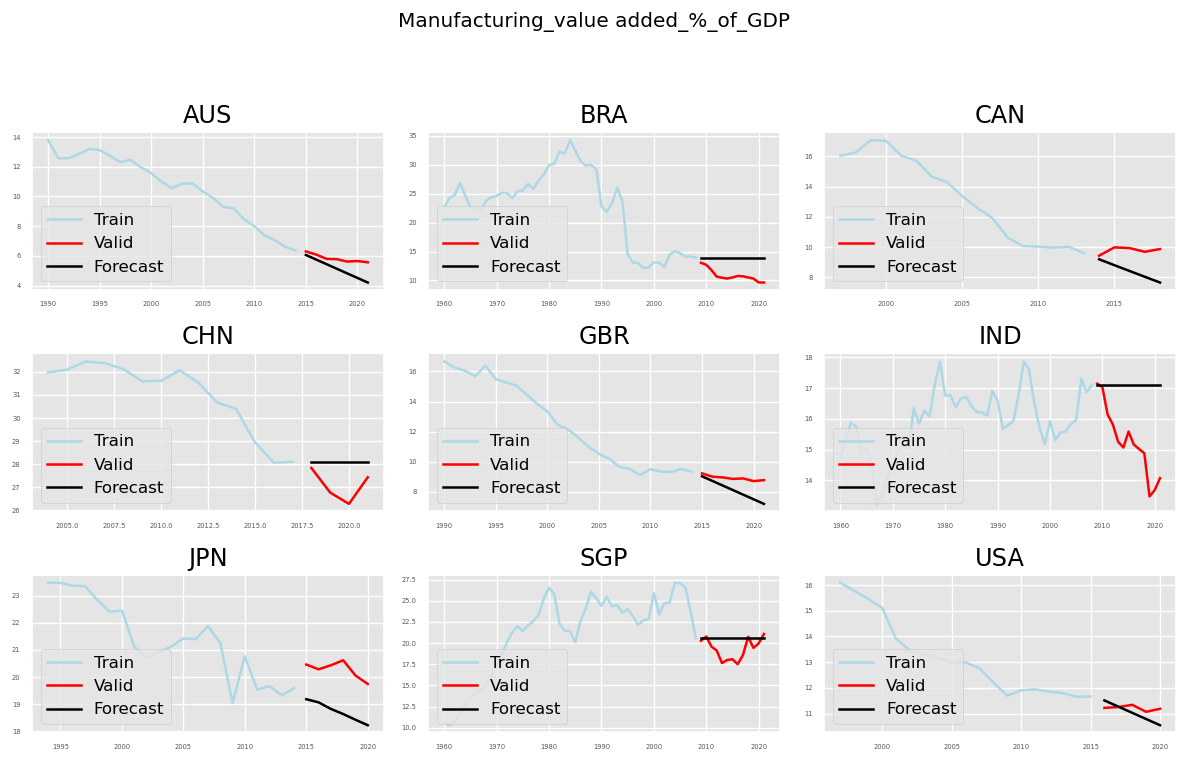

In [41]:
# for manufaturing
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_manu[country[i]],color = "lightblue",label="Train")
    ax.plot(valid_manu[country[i]],color = "red",label="Valid")
    ax.plot(forecast_manu[country[i]],color = "black",label="Forecast")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)
    ax.legend(loc="lower left")

plt.suptitle("Manufacturing_value added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

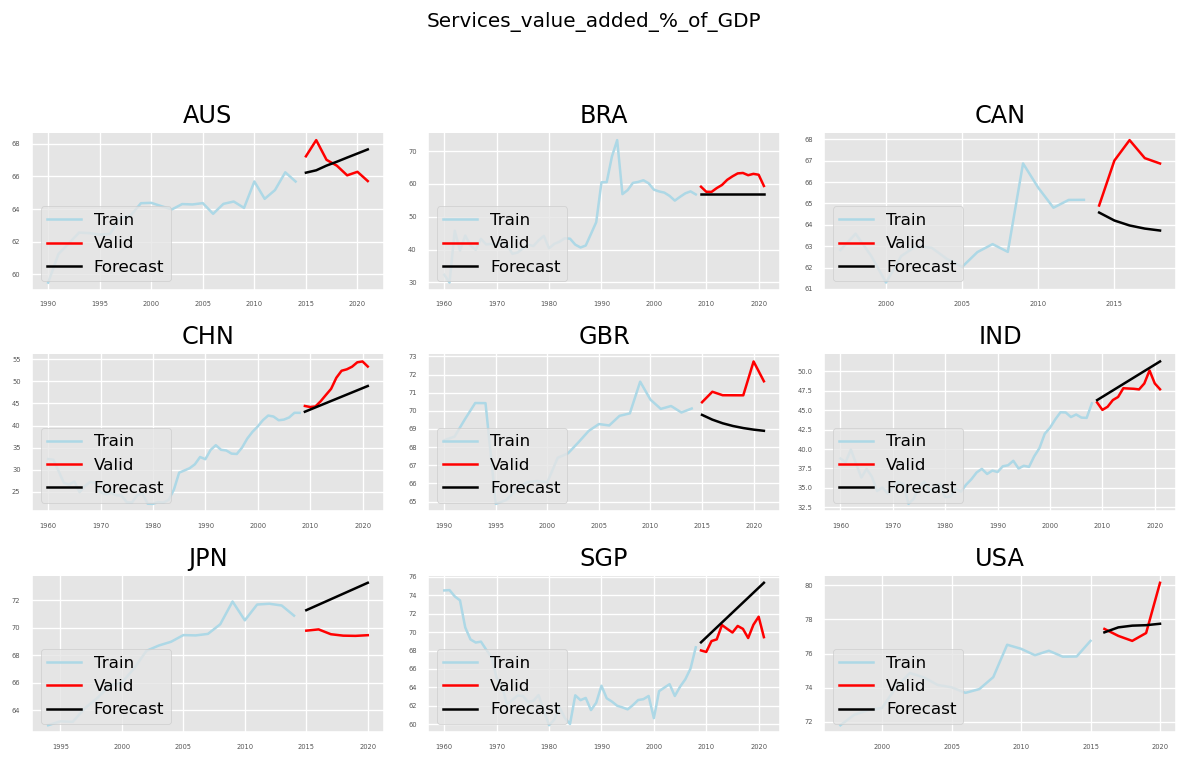

In [42]:
# for service
fig, axes = plt.subplots(3, 3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    ax.plot(train_ser[country[i]],color = "lightblue",label="Train")
    ax.plot(valid_ser[country[i]],color = "red",label="Valid")
    ax.plot(forecast_ser[country[i]],color = "black",label="Forecast")
    # Decorations
    ax.set_title(country[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)
    ax.legend(loc="lower left")

plt.suptitle("Services_value_added_%_of_GDP",y=1.05)
plt.tight_layout()
plt.show()

#### RMSE

In [43]:
from math import sqrt
from sklearn.metrics import mean_squared_error
for con in country:
  rms = sqrt(mean_squared_error(valid_manu[con],forecast_manu[con]))
  print(f"RMSE for {con} manufacture:", rms)
  rmse = sqrt(mean_squared_error(valid_ser[con],forecast_ser[con]))
  print(f"RMSE for {con} service:", rmse)
  print("\n")

RMSE for AUS manufacture: 0.8016826209570523
RMSE for AUS service: 1.2422389948694044


RMSE for BRA manufacture: 3.2476412564559145
RMSE for BRA service: 4.543213768589233


RMSE for CAN manufacture: 1.5095900536661893
RMSE for CAN service: 2.9844711521391156


RMSE for CHN manufacture: 1.1840401871290893
RMSE for CHN service: 4.2299861648508275


RMSE for GBR manufacture: 0.9332449724931485
RMSE for GBR service: 2.168863762347901


RMSE for IND manufacture: 2.137126570041298
RMSE for IND service: 1.6925560706637357


RMSE for JPN manufacture: 1.5578648374085926
RMSE for JPN service: 2.814938305792673


RMSE for SGP manufacture: 1.7621949688714702
RMSE for SGP service: 2.773234695482576


RMSE for USA manufacture: 0.36532708181979334
RMSE for USA service: 1.185672165933367




## Multivariate Time Series Analysis

#### Missing Data Imputation

In [44]:
# only reserve the value with actual target value for each country
for con in country:
  manufacture[con] = manufacture[con][~manufacture[con]['Manufacturing_value added_%_of_GDP'].isna()]
  manufacture[con].index = manufacture[con]['Year']
  service[con] = service[con][~service[con]['Services_value_added_%_of_GDP'].isna()]
  service[con].index = service[con]['Year']

In [45]:
# interpolate imputation
for con in country:
  manufacture[con] = manufacture[con].interpolate(option='spline')
  service[con] = service[con].interpolate(option='spline')

In [46]:
# check each country's variable missing rate
def percent_miss(df):
  percent_missing = df.isnull().sum() * 100 / len(df)
  print(percent_missing)

for con in country:
  print(f"=======Manufature {con}=======")
  percent_miss(manufacture[con])
  print(f"=======Service {con}=======")
  percent_miss(service[con])
  

=======Manufature AUS=======
Year                                                                                       0.000
Employment_in_industry_male                                                                3.125
High_technology_exports                                                                   53.125
Research_development_expenditure                                                          18.750
Researchers in R&D                                                                        18.750
Population_labor_rate                                                                      0.000
Population_density                                                                         0.000
Foreign_direct_investment                                                                  0.000
Net_trade_in_goods_services                                                                0.000
Air_freight_million_ton_km                                                                 0.000
C

In [47]:
# drop columns which are all nan
for con in country:
  manufacture[con] = manufacture[con].dropna(axis=1, how='all')
  service[con] = service[con].dropna(axis = 1, how = 'all')

In [48]:
# all left missing value are starting from the very beginning, therefore using NOCB to fill them
for con in country:
  manufacture[con] = manufacture[con].bfill()
  service[con] = service[con].bfill()

#### Time Series Visualization

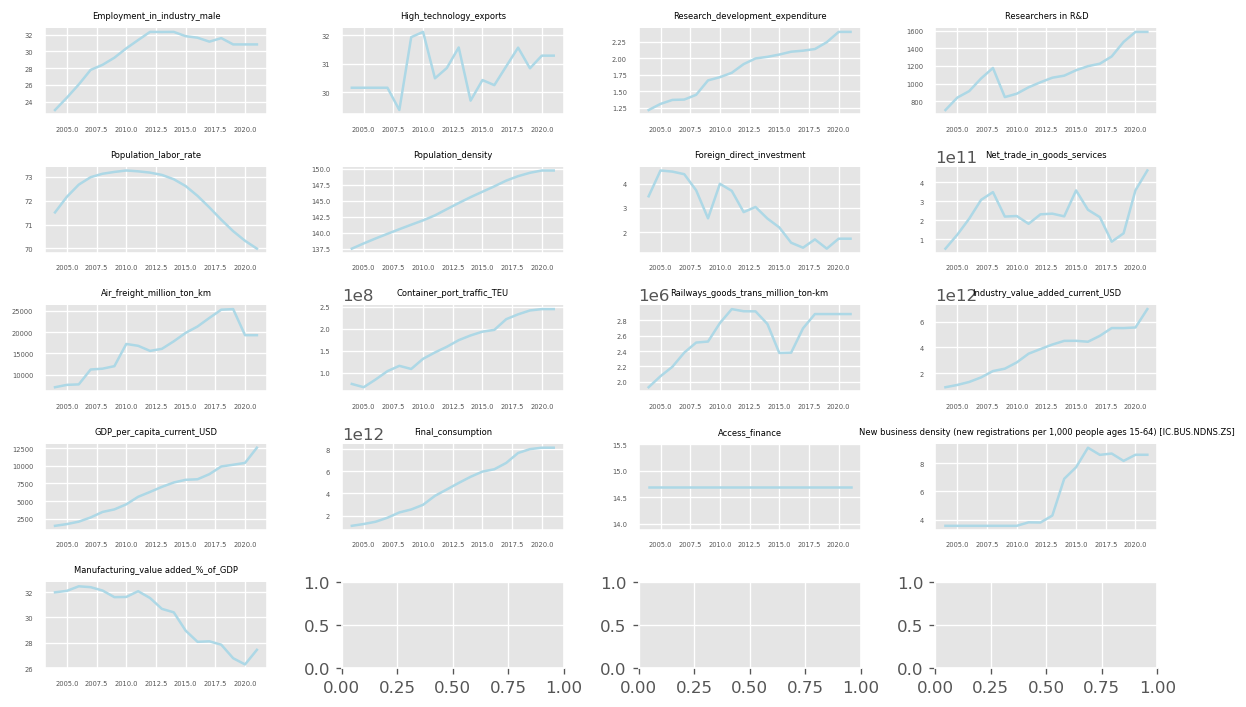

In [49]:
# can change the argument to plot different country and type
def plot_time_series(df, var_num):
  fig, axes = plt.subplots(var_num//4 + 1,4, dpi=120, figsize=(10,6))
  for i, ax in enumerate(axes.flatten()):
      if (i >= var_num - 1): break
      data = df[df.columns[i+1]]
      ax.plot(df[df.columns[0]],data, color = "lightblue",ms = 1)
      # Decorations
      ax.set_title(df.columns[i+1],fontsize=5)
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=4)

  plt.tight_layout()
  plt.show()
plot_time_series(manufacture['CHN'],len(manufacture['CHN'].columns))

#### ADF test

Using IND, CHN and USA as baseline model checking.

In [50]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [51]:
def adfuller_simple(series, name,signif=0.05):
  r = adfuller(series, autolag='AIC')
  output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
  p_value = output['pvalue'] 
  if p_value <= signif: 
    print(f"{name}: TRUE")
    return True
  else:
    print(f"{name}: FALSE")
    return False

In [52]:
def adf_testing(df,con,is_manu):
  adf = df.drop(["Year"], axis = 1)
  if is_manu:
    print(f"=======Manufacture {con}=======")
  else:
    print(f"=======Service {con}=======")
  for name, column in adf.iteritems():
    adfuller_simple(column, name=column.name)

In [53]:
for con in country:
  adf_testing(manufacture[con],con,True)
  print("\n")
  adf_testing(service[con],con,False)
  print("\n")

=======Manufacture AUS=======
Employment_in_industry_male: TRUE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: FALSE


=======Service AUS=======
Employment_in_services_male: FALSE
Urban_population_growth: FALSE
Net_trade_in_goods_services: FALSE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divid

Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Primary_completion_rate: FALSE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: TRUE
Poverty_headcount_ratio: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: FALSE


=======Manufacture GBR=======
Employment_in_industry_male: FALSE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: FALSE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Fi

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divid

Researchers in R&D: FALSE
Population_labor_rate: TRUE
Population_density: FALSE
Foreign_direct_investment: FALSE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: FALSE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: FALSE


=======Service SGP=======
Employment_in_services_male: FALSE
Urban_population_growth: FALSE
Net_trade_in_goods_services: FALSE
Foreign_direct_investment: FALSE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: FALSE
Population_labor_rate: TRUE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Primary_completion_rate: FALSE
Educational_attainment: 

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [54]:
# perform first order difference
diff_manu = {}
diff_ser = {}
for con in country:
  diff_manu[con] = manufacture[con].diff().dropna()
  diff_ser[con] = service[con].diff().dropna()

In [55]:
for con in country:
  adf_testing(diff_manu[con],con,True)
  print("\n")
  adf_testing(diff_ser[con],con,False)
  print("\n")

=======Manufacture AUS=======
Employment_in_industry_male: TRUE
High_technology_exports: FALSE
Research_development_expenditure: FALSE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_value added_%_of_GDP: TRUE


=======Service AUS=======
Employment_in_services_male: FALSE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE


/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divid

Population_density: FALSE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Primary_completion_rate: TRUE
Educational_attainment: FALSE
Individuals_using_the_Internet_%_of_population: TRUE
Poverty_headcount_ratio: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE


=======Manufacture GBR=======
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: FALSE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business den

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divid

Population_labor_rate: FALSE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: FALSE
Air_freight_million_ton_km: FALSE
Container_port_traffic_TEU: TRUE
Industry_value_added_current_USD: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE


=======Service SGP=======
Employment_in_services_male: FALSE
Urban_population_growth: TRUE
Net_trade_in_goods_services: FALSE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: FALSE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: FALSE
Population_labor_rate: FALSE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: FALSE
GDP_per_capita_current_USD: FALSE
Final_consumption: FALSE
Primary_completion_rate: FALSE
Educational_attainment: FALSE
Individuals_using_the_Int

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [56]:
# perform first order difference
diff2_manu = {}
diff2_ser = {}
for con in country:
  diff2_manu[con] = diff_manu[con].diff().dropna()
  diff2_ser[con] = diff_ser[con].diff().dropna()

In [57]:
for con in country:
  adf_testing(diff2_manu[con],con,True)
  print("\n")
  adf_testing(diff2_ser[con],con,False)
  print("\n")

=======Manufacture AUS=======
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_value added_%_of_GDP: TRUE


=======Service AUS=======
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divid

Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: FALSE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Educational_attainment: TRUE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE


=======Manufacture GBR=======
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_valu

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divid

Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE


=======Service SGP=======
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
Primary_completion_rate: FALSE
Educational_attainment: TRUE
Individuals_using_the_Internet_%_of_population: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Will use second order difference. And since target value of **Manufacture USA** and **Service CAN** are non-stationary, we will not take this analysis into consideration.

In [58]:
# drop the variable that are still non-stationary after seconde order diff
def drop_non_stat(df):
  adf = df.drop(["Year"], axis = 1)
  for name, column in adf.iteritems():
    if not adfuller_simple(column, name=column.name):
      adf = adf.drop([column], axis = 1)
  return adf

In [59]:
def drop_non_stat(df):
  adf = df.drop(["Year"], axis = 1)
  for name, column in adf.iteritems():
      if not adfuller_simple(column, name=column.name):
        adf = adf.drop([column.name], axis = 1)
      else:
        continue
  return adf

In [60]:
df_manu = {}
df_ser = {}
for con in country:
  df_manu[con] = drop_non_stat(diff2_manu[con])
  df_ser[con] = drop_non_stat(diff2_ser[con])

Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: TRUE
Manufacturing_value added_%_of_GDP: TRUE
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: TRUE
School_enrollment_tertiary: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: FALSE
Industry_value_added_current_USD: TRUE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_cur

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divid

Population_labor_rate: TRUE
Population_density: TRUE
Access_electricity: TRUE
Industry_value_added_current_USD: FALSE
Employment_in_industry_%_of_total_employment: TRUE
GDP_per_capita_current_USD: FALSE
Final_consumption: TRUE
Primary_completion_rate: TRUE
Educational_attainment: TRUE
Individuals_using_the_Internet_%_of_population: FALSE
Poverty_headcount_ratio: FALSE
Access_finance: FALSE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: FALSE
Population_density: FALSE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Railways_goods_trans_million_ton-km: FALSE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (ne

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divid

Poverty_headcount_ratio: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Services_value_added_%_of_GDP: TRUE
Employment_in_industry_male: TRUE
High_technology_exports: TRUE
Research_development_expenditure: TRUE
Researchers in R&D: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Foreign_direct_investment: TRUE
Net_trade_in_goods_services: TRUE
Air_freight_million_ton_km: TRUE
Container_port_traffic_TEU: TRUE
Industry_value_added_current_USD: TRUE
GDP_per_capita_current_USD: TRUE
Final_consumption: TRUE
New business density (new registrations per 1,000 people ages 15-64) [IC.BUS.NDNS.ZS]: FALSE
Manufacturing_value added_%_of_GDP: TRUE
Employment_in_services_male: TRUE
Urban_population_growth: TRUE
Net_trade_in_goods_services: TRUE
Foreign_direct_investment: TRUE
Mobile_cellular_subscriptions: TRUE
Secure_Internet_servers: FALSE
School_enrollment_tertiary: TRUE
Population_labor_rate: TRUE
Population_density: TRUE
Access_electric

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


#### VAR Model Fitting

In [61]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [62]:
def split_train_test(df, percentage = 0.8):
  train = df[:int(percentage*(len(df)))]
  valid = df[int(percentage*(len(df))):]
  return train, valid

In [63]:
train_manu = {}
valid_manu = {}
train_ser = {}
valid_ser = {}
for con in country:
  train_manu[con], valid_manu[con] = split_train_test(df_manu[con])
  train_ser[con], valid_ser[con] = split_train_test(df_ser[con])

In [64]:
train_manu['USA']

,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_density,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Final_consumption
Year,,,,,,,,,,
1999,-0.000004,0.000000,0.02146,-107.614258,-0.001201,-3.184100e+10,1255.199219,0.000000e+00,-2849.0,1.027910e+11
2000,-0.029995,0.000000,0.03350,-26.903320,-0.016896,-2.419300e+10,1345.476953,0.000000e+00,-18480.0,7.925300e+10
2001,-0.350002,0.000000,-0.05963,40.142334,-0.024633,1.231920e+11,-5127.182781,-9.924240e+05,15123.0,-1.623970e+11
2002,-0.449997,0.000000,-0.10855,14.319824,-0.016406,-6.960900e+10,3877.523000,3.361738e+06,-68345.0,-2.437700e+10
2003,0.699997,0.000000,0.09433,156.461426,-0.018937,-1.529200e+10,3020.754000,6.432800e+05,-11925.0,1.095600e+11
2004,0.360001,0.000000,-0.06741,-347.087158,0.023426,-3.899700e+10,-1406.303000,-8.004500e+05,120154.0,1.043840e+11
2005,-0.139999,0.000000,0.07666,58.934082,0.001521,8.878000e+09,-3337.044000,1.384067e+06,-45116.0,5.046100e+10
2006,0.380001,0.000000,0.02613,109.935303,0.016592,5.870800e+10,2616.728000,-1.197308e+06,106788.0,-2.811700e+10
2007,-0.650002,0.000000,0.03330,-88.489502,-0.001312,9.952900e+10,-1788.407000,1.543745e+06,-231907.0,-2.415900e+10


In [65]:
# select the order of model
model_manu = {}
model_ser = {}
for con in country:
  model = VAR(endog=train_manu[con])
  res = model.fit()
  model_manu[con] = res
  model = VAR(endog=train_ser[con])
  res = model.fit()
  model_ser[con] = res

/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jace/miniforge3/envs/TF/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An u

In [66]:
model_manu['AUS']

#### Forecasting

In [67]:
forecast_manu = {}
forecast_ser = {}
def forecast_var(model, train,valid,con, manu):
  forecast = model.forecast(train.values, steps = len(valid))
  df_forecast = pd.DataFrame(data = forecast,columns = train.columns,index = valid.index)
  manu[con] = df_forecast

for con in country:
  forecast_var(model_manu[con],train_manu[con], valid_manu[con],con, forecast_manu)
  forecast_var(model_ser[con],train_ser[con], valid_ser[con],con, forecast_ser)

In [68]:
forecast_manu["USA"]

,Employment_in_industry_male,High_technology_exports,Research_development_expenditure,Researchers in R&D,Population_density,Net_trade_in_goods_services,Air_freight_million_ton_km,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Final_consumption
Year,,,,,,,,,,
2016,0.054116,-1.892122,0.047981,282.684352,-0.012509,1.354734e+11,-3315.354394,-7.538259e+06,240148.093953,-2.822062e+11
2017,-0.709601,1.634133,-0.227592,-427.774422,-0.060005,-7.237660e+10,4275.221855,1.051684e+07,-35935.679435,1.242053e+11
2018,1.176815,0.887088,0.174096,403.136581,0.018293,-2.524195e+11,2400.023645,-2.159082e+06,43648.408710,2.756247e+11
2019,-0.493438,-1.078918,-0.094350,-19.868473,-0.050326,3.911025e+11,-5305.692068,-4.952375e+06,-100796.944917,-4.332571e+11
2020,0.351154,2.848132,-0.076201,-353.601599,0.010391,-2.872632e+11,4008.571416,9.646048e+06,101530.385154,3.846122e+11


#### RMSE Evaluation

In [69]:
for con in country:
  if con != "USA": 
    rms = sqrt(mean_squared_error(valid_manu[con]["Manufacturing_value added_%_of_GDP"],forecast_manu[con]["Manufacturing_value added_%_of_GDP"]))
    print(f"RMSE for {con} manufacture:", rms)
  if con != "CAN": 
    rmse = sqrt(mean_squared_error(valid_ser[con]["Services_value_added_%_of_GDP"],forecast_ser[con]["Services_value_added_%_of_GDP"]))
    print(f"RMSE for {con} service:", rmse)
  print("\n")

RMSE for AUS manufacture: 1.7725839927149023
RMSE for AUS service: 1.8330639262365942


RMSE for BRA manufacture: 16820887002759.09
RMSE for BRA service: 2.832768446483367


RMSE for CAN manufacture: 0.3659435274006635


RMSE for CHN manufacture: 1.730347290377633
RMSE for CHN service: 0.8073392139360749


RMSE for GBR manufacture: 0.2604776808772211
RMSE for GBR service: 4.044291771730318


RMSE for IND manufacture: 5.368125038861656
RMSE for IND service: 29.444557691019536


RMSE for JPN manufacture: 1.95745396260387
RMSE for JPN service: 1.0327516058458206


RMSE for SGP manufacture: 265.7379119076181
RMSE for SGP service: 3.192565891253033


RMSE for USA service: 1.1609146058982576


